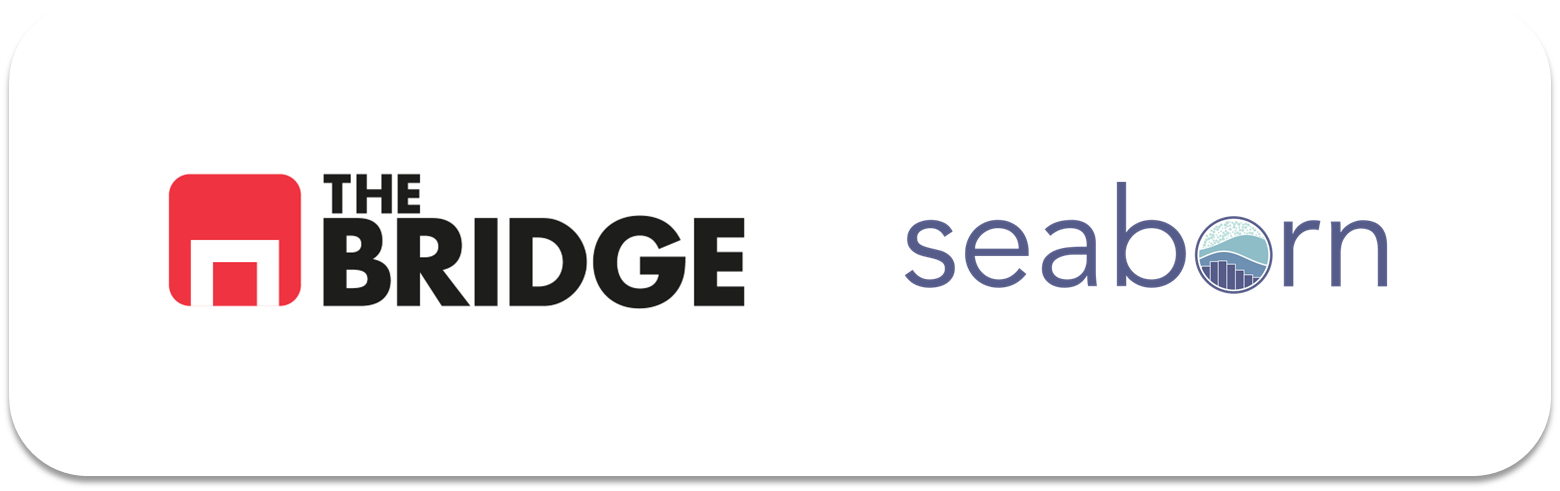

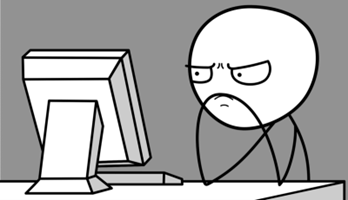

Para ejercitarte y afianzar lo aprendido sobre visualización de datos de variables columnas a la vez, completa los siguientes ejercicios. Recuerda que necesitarás datos que están en el directorio data que acompaña al notebook (búscalo en el repositorio de ejercicios)
  
La solución a los mismos las tienes ya, intenta no mirarlos de primeras pero no dejes de hacerlo cuando hayas terminado por si te pudieran aportar.

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Ejercicio 1

Carga los siguientes datasets que necesitarás para poder hacer el resto de ejercicios:
1. Titanic, "./data/titanic.csv"
2. Viajes, "./data/dataset_viajes_jun23"

In [2]:
df_titanic = pd.read_csv("./data/titanic.csv") # cargamos los datos del titanic
df_viajes = pd.read_csv("./data/dataset_viajes_jun23.csv") # cargamos los datos de viajes


### Ejercicio 2

Crea una función que tenga como argumentos un dataframe, el nombre de una columa categórica, el nombre de otra columna categórica y que haga lo siguiente:
1. Dibuje una combinación de gráficas con las frecuencias absolutas de cada columna categórica y una figura con el catplot de las dos columnas usando la segunda como valor para el argumento col. Utiliza countplot para las frecuencias y un subplots de 1 fila y dos columnas, añade una figura con catplot para la comparación. 
2. Devuelva la tabla de contigencia de las dos columnas.


In [10]:
def compara_categoricas(df, col1_categorica, col2_categorica):
   """
    OBJETIVO DE LA FUNCIÓN:
    1-Mostrar dos countplot de las columnas categóricas.
    2-Mostrar un catplor de las dos columnas categóricas.
    3-Crear una tabla de contingencia entre las dos columnas categóricas.
    """
   # PRIMERA PARTE - COUNTPLOT

   fig, axs = plt.subplots(1 ,2, figsize = (15,5)) # Creamos la figura y los ejes.
   sns.countplot( data = df, x = col1_categorica, ax = axs[0], hue = col1_categorica) # primer countplot de la primera columna categórica. EL counrplot nos muestra la frecuencia de la variable categórica.
   axs[0].set_title(f"Frecuencias Absolutas de {col1_categorica}") # Asignamos título al primer countplot
   sns.countplot( data = df, x = col2_categorica, ax = axs[1], hue = col2_categorica) # segundo countplot de la segunda columna categórica que hemos indicado en los parámetros de la función.
   axs[1].set_title(f"Frecuencias Absolutas de {col2_categorica}")

   plt.show() # Mostramos la figura con dos countplots.

   
   # SEGUNDA PARTE - CATPLOT
   catplot = sns.catplot(data = df, x = col1_categorica, col = col2_categorica, kind = 'count', hue = col1_categorica ) # "col = col2 categoria" hará que se sque un diagrama por cada valor categórica de "col2_categoria"
   catplot.fig.suptitle(f"Catplot de {col1_categorica} por {col2_categorica}", y = 1.1)

   # TERCERA PARTE - TABLA DE CONTINGENCIA ENTRE DOS VARIABLES CATEGÓRICAS.
   tabla_contingecia = pd.crosstab(df[col1_categorica],df[col2_categorica]) # Creamos una tabla de contingencia en la que de nos mostrará "col1_categorica" como eje "x" y "col2_categorica" como eje "y"
   return tabla_contingecia # Hacemos que nos retorne la tabla de contingencia. Esta tabla no es mapa de color, simplemente nos devuelve DATAFRAME donde podemos ver cómo están situados los datos 








### Ejercicio 3

Aplicalo para comparar por un lado "alive" y "who" y "alive" y "class" del dataset del titanic.

#### Alive y who

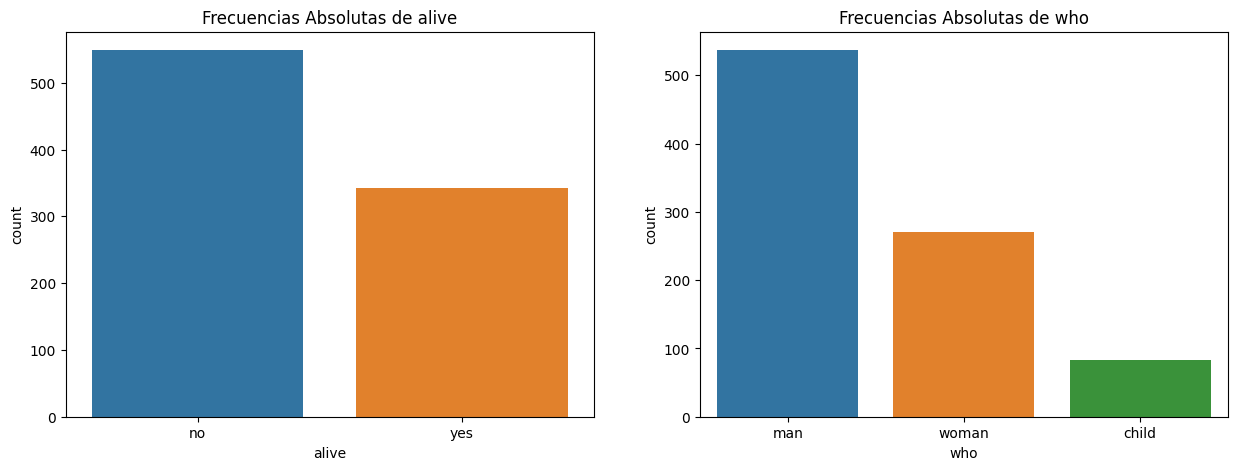

who,child,man,woman
alive,,,
no,34,449,66
yes,49,88,205


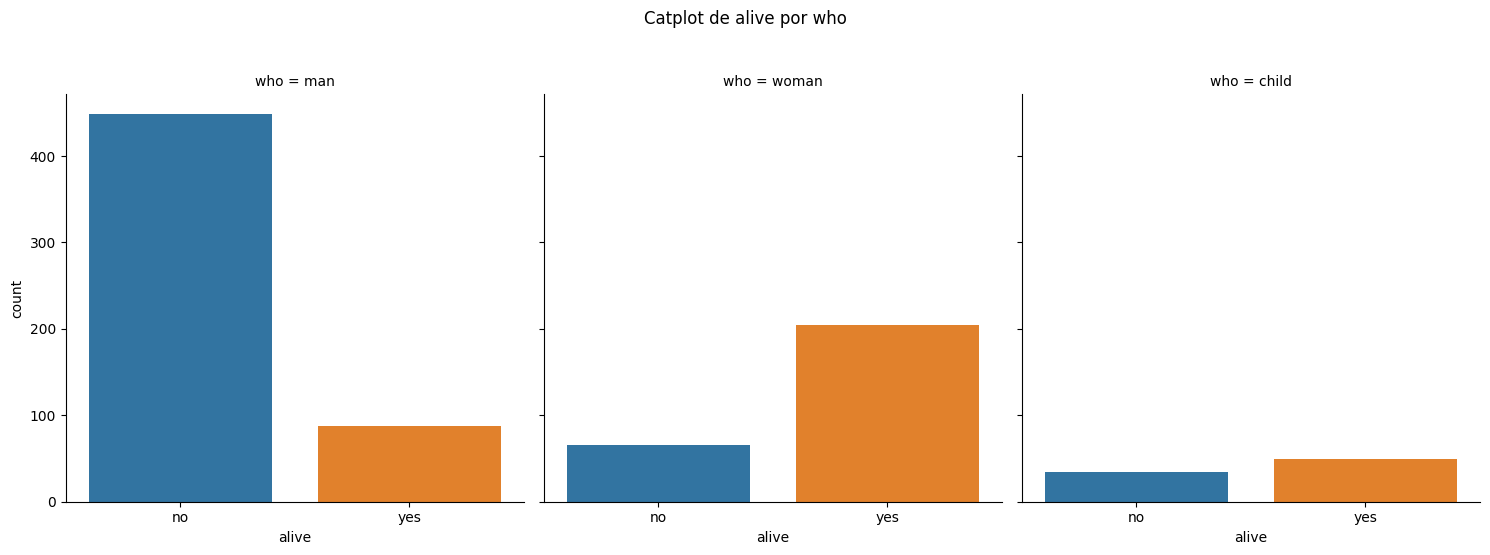

In [11]:
compara_categoricas(df_titanic,col1_categorica="alive",col2_categorica="who")

#### Alive y Class

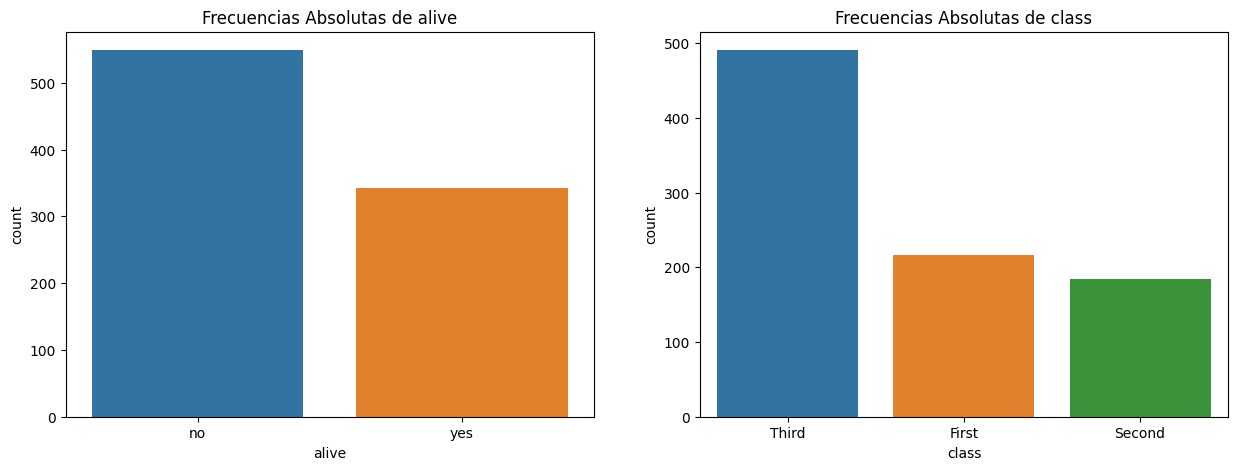

class,First,Second,Third
alive,,,
no,80,97,372
yes,136,87,119


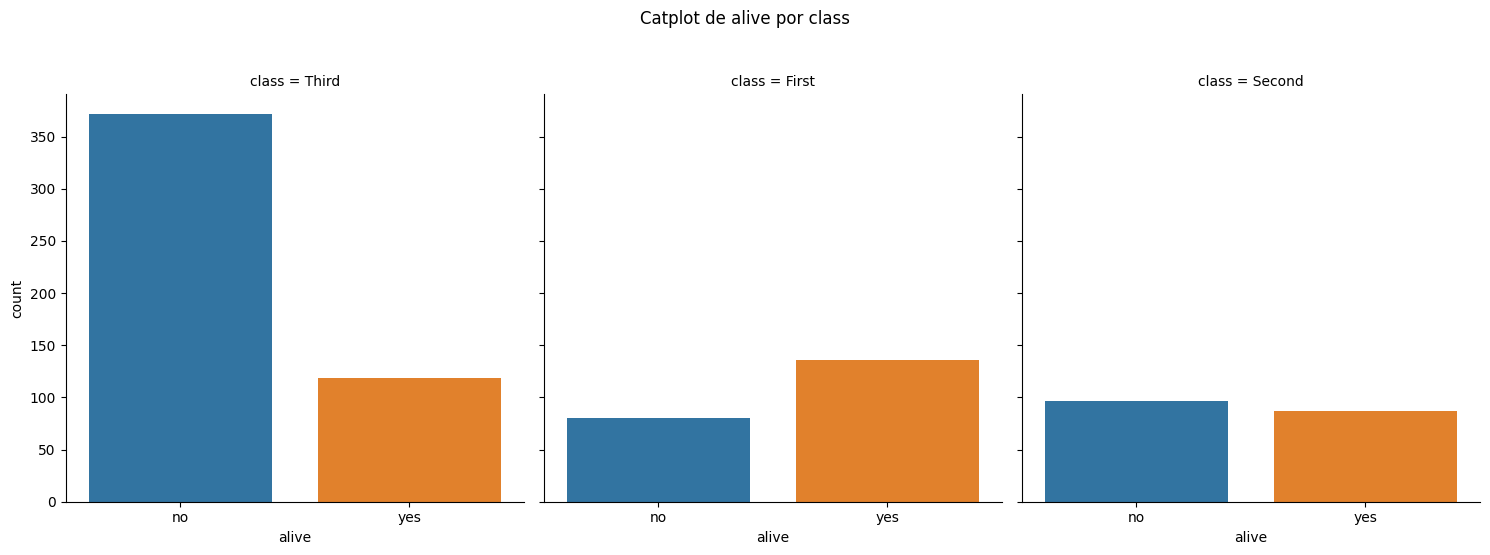

In [12]:
compara_categoricas(df_titanic,col1_categorica="alive",col2_categorica="class")

### Ejercicio 4

Crea una función que compare ahora una variable categórica y otra numérica. Para ello, se aconseja reutilizar código de las funciones que viste en el grupo anterior de ejercicios para pintar histogramas, crea una función que haga lo siguiente:
1. Admita tres parámetros o argumentos: Un dataframe, el nombre de una columna categórica del mismo, el nombre de una columna numérica del mismo.
2. Cree una matriz de gráficos, tantas como valores de la variable categórica, con un máximo de tres columnas por fila y todas las filas que necesite.
3. Asigne a cada gráfica el histograma de la variable numérica pero sólo para las filas que tengan el valor que corresponda de la variable categórica (así si el primer valor de la categórica es Val1 y la variable numérica se llama Num1, en la primera gráfica estará el histograma de Num1 sólo para las filas que tengan Val1)
4. Añada el título "Histograma de {variable numerica} para el valor {valor correspondiente de la categórica} a cada gráfica.

In [36]:
def compara_cat_num(df,columna_categorica,columna_numerica):

    # SABER VALORES ÚNICOS DE LA VARIABLE CATEGORICA & CALCULO DE Nº FILAS.
    unique_categorica = df[columna_categorica].unique() # obtenemos los valores únicos de la variable categórica.
    n_rows = len(unique_categorica) // 3 + (len(unique_categorica) % 3 > 0)  # Calculamos el número de filas que se nesetian para acomodar todos los histogramas teniedno en cuenta que el máximo son 3 columnas por fila.
   

    # CREACIÓN DE FIGURA

    fig,axs = plt.subplots(n_rows, 3,figsize = (15, n_rows * 5)) # Creamos la figura . Determinamos el que número de filas está determinado por el resultado que salga en n_rows, que depende del número de valores unicos en nuetra variable categórica.
    axs = axs.flatten() # Ajustamos los ejes para que se conviertan en un array unidimensional y asi poder iterar sobre ellos sin errores.
    for i, valor in enumerate(unique_categorica): # Por cada valor en nuestra variable "unique_categorica"
      subset_df = df[df[columna_categorica] == valor] # filtramos el dataframe para obtener solo las filas donde la columna categórica es igual al valor actual
      sns.histplot(subset_df[columna_numerica], ax=axs[i], kde=True) #Creamos el histograma para la columna numérica filtrada por el valor de la columna categórica actual.
      axs[i].set_title(f'Histograma de {columna_numerica} para el valor {valor}') #asignamos el titulo correspondiente a cada histograma

    for j in range(i + 1, len(axs)): # quitamos los ejes de la subfigura que no tiene gráfica asignada, si la hay
        axs[j].axis('off')

    # Ajustamos el layout para que no se superpongan nuestros títulos y etiquetas.
    plt.tight_layout()
    plt.show()

### Ejercicio 5

Aplica la función anterior para ver los histogramas de "ingresos" y "consumo_kg" por compañía aérea del dataset de viajes. ¿Qué argumentos añadirías a la función para poder generar mejores visualizaciones?

#### Aircompany e Ingresos

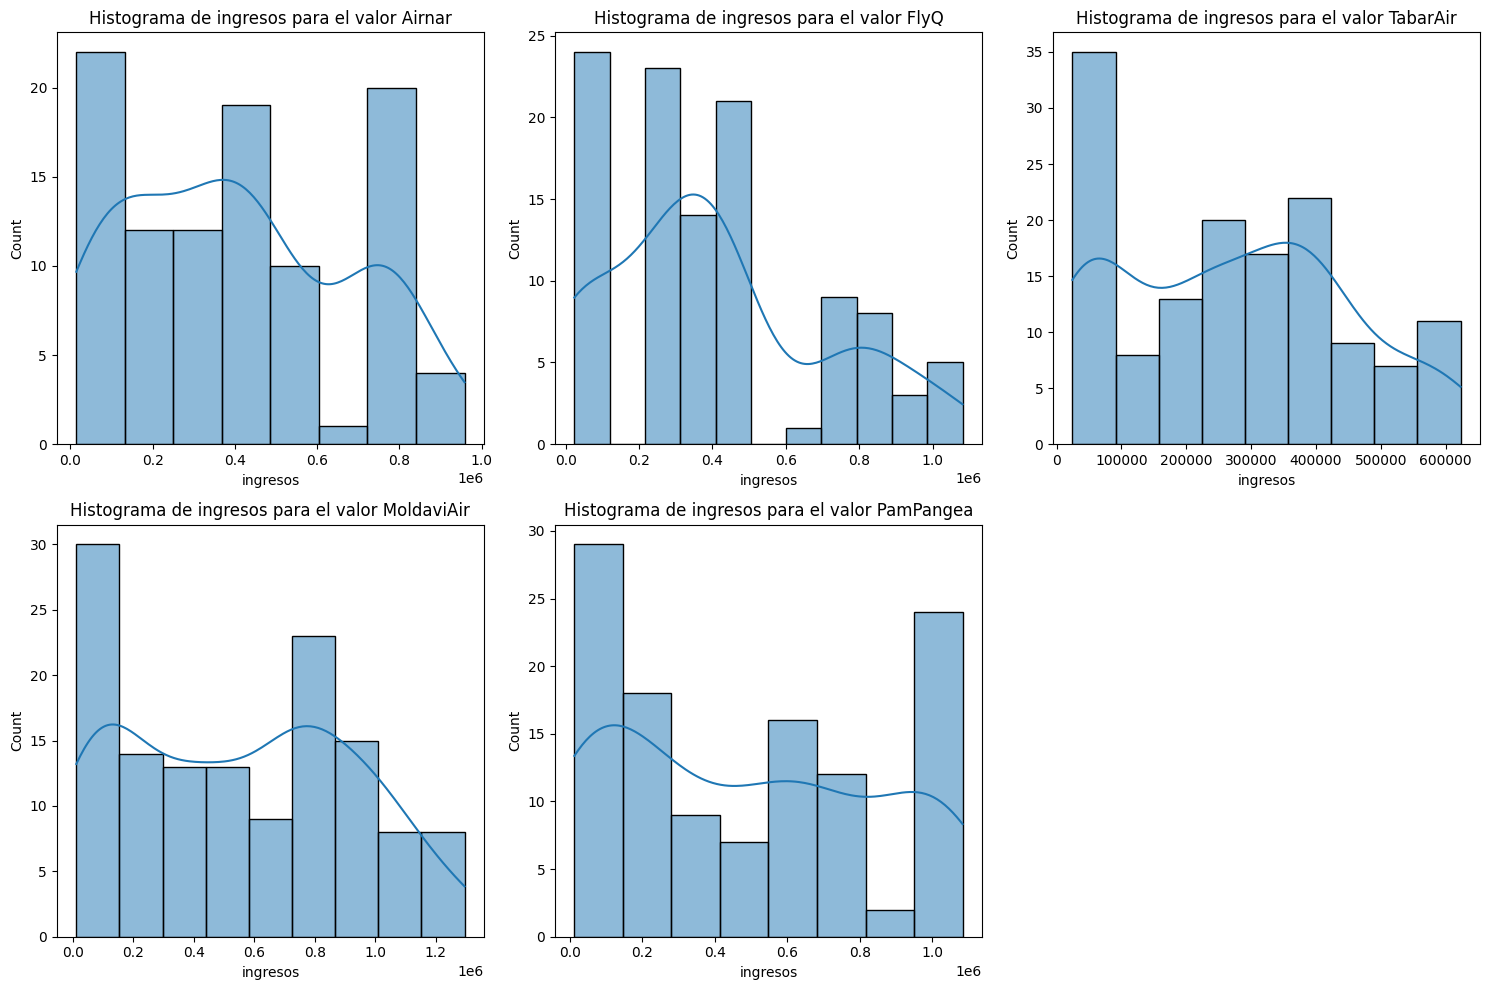

In [37]:
compara_cat_num(df_viajes,"aircompany","ingresos")

#### Aircompany y Consumo_kg

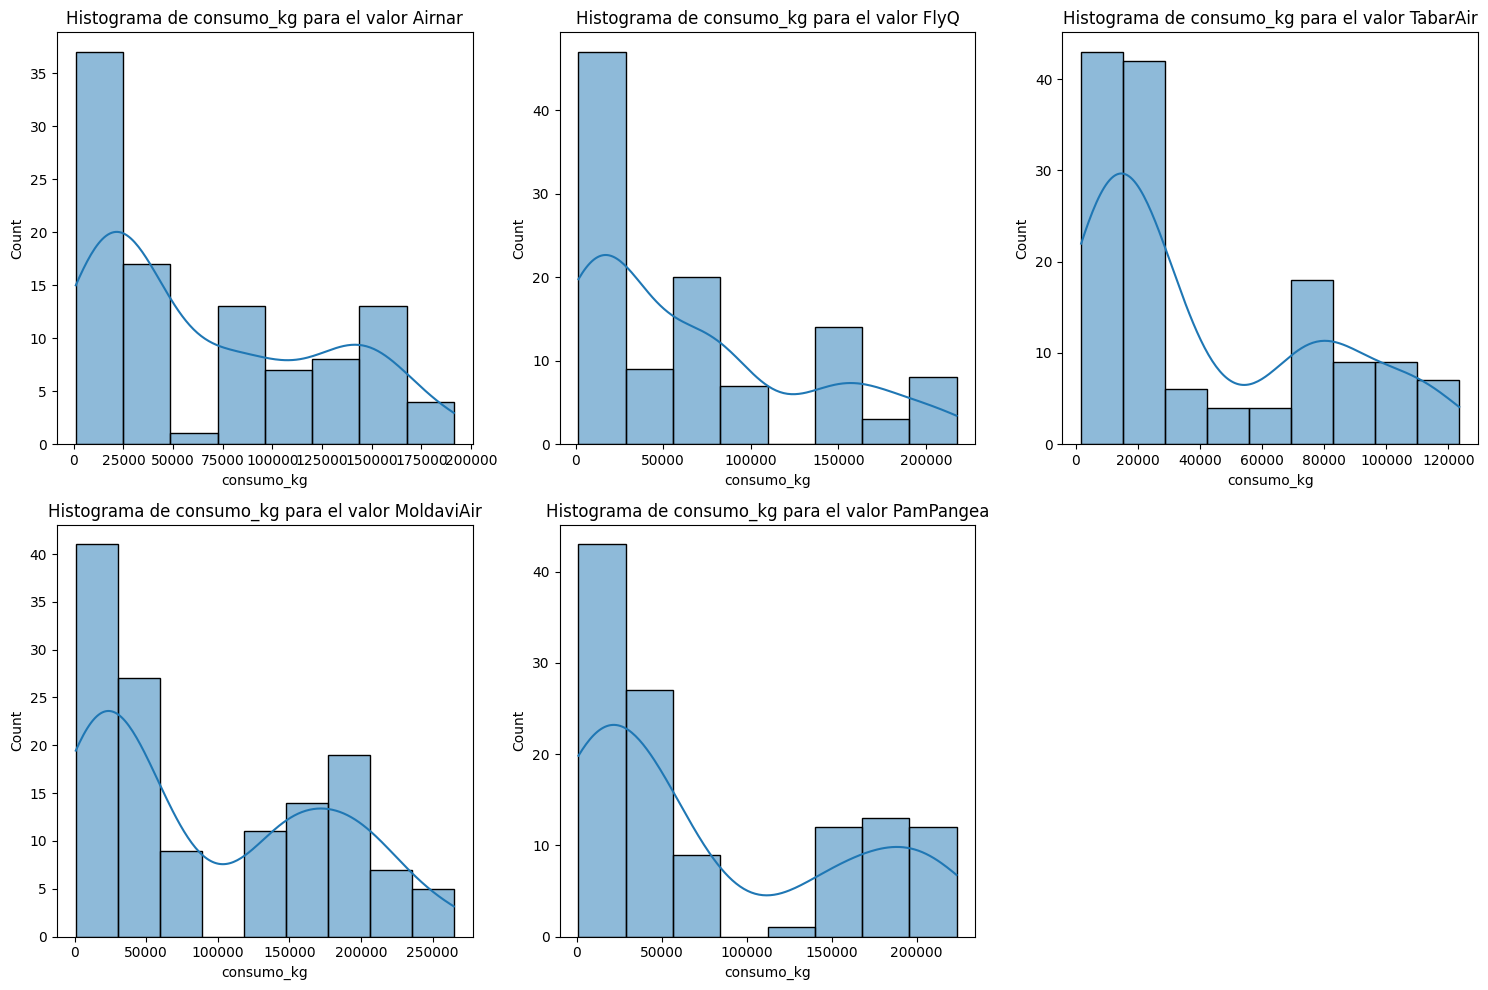

In [40]:
compara_cat_num(df_viajes,"aircompany","consumo_kg")

### Ejercicio 6

Crea una función para pintar diagramas de dispersion que tenga cinco argumentos:
1. Un dataframe
2. Una columna numérica del dataframe
3. Una columna numérica del dataframe diferente a la anterior.
4. Un columna categórica (Opcional, valor por defecto None)
5. Un valor para el tamaño de los puntos.

La función debe pintar el diagrama de dispersión de la columna numérica 1, en el eje X, frente a la columna numérica 2, en el eje Y, usando un código de colores en función de la columna categórica y con el tamaño de los puntos según el argumento correspondiente. 

Si no se diera una columna categórica como argumento, el color no debe pasarse como parámetro a la función de Seaborn que uses. [Nota: como en todos los ejercicios anteriores, debes usar Seaborn para pintar]

In [48]:
def compara_multi(df,columna_numerica_1, columna_numerica_2, columna_categorica = None, size = 8):
    plt.figure(figsize = (10,7)) # creamos la figura con el tamaño que nos parece cómodo.

    if columna_categorica: # Si le indicamos a nuestra función una columna categórica, entoces creamos un scatterplot con la columna categorica como parametro hue, es decir, como parámetro que nos dará color a los puntos del scatterplot.
        sns.scatterplot(data = df, x = columna_numerica_1, y = columna_numerica_2, hue = columna_categorica, size = size, sizes=(20,200), alpha = 0.8) # Creamos el scatterplot con los parametros. "alpha" nos ajustar las transparencias de los puntos

    else: # Si no le indicamos una columna categórica, entonces la función nos creará un scatterplot sin color.
        sns.scatterplot(data = df, x = columna_numerica_1, y = columna_numerica_2, s = size)
        plt.title(f'Diagrama de Dispersión de {columna_numerica_1} vs {columna_numerica_2} {(f"y con {columna_categorica} en color") if columna_categorica else ""}')
    plt.xlabel(columna_numerica_1)
    plt.ylabel(columna_numerica_2)
    plt.show()

### Ejercicio 7

Usa la función del ejercicio anterior para pintar la comparativa entre ingresos, consumo_kg y compañía aérea. ¿Si quisieras usarla como visualización que quitarías, añadirías o remarcarías?

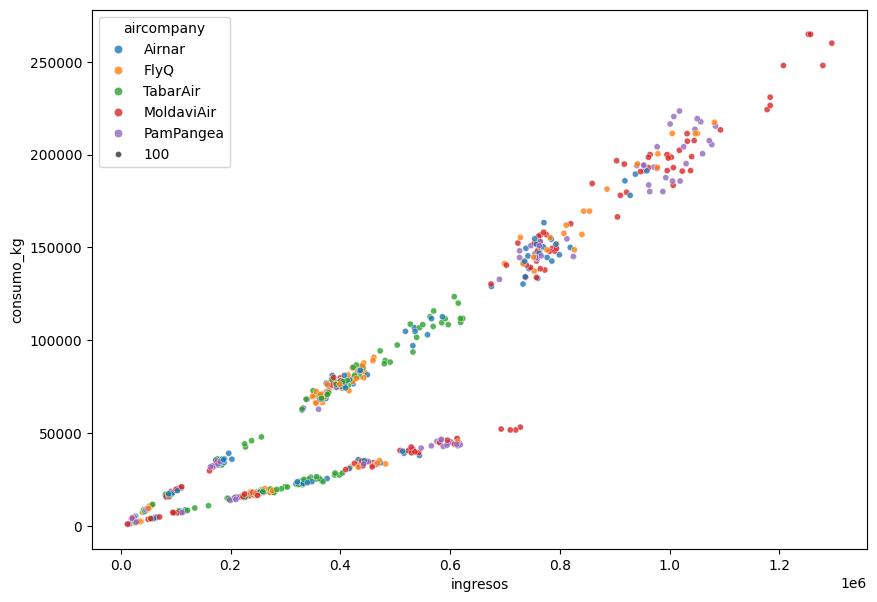

In [51]:
compara_multi(df=df_viajes, columna_numerica_1="ingresos",columna_numerica_2="consumo_kg",columna_categorica="aircompany", size = 100)

*Simplificaría los ejes, valores máximo y mínimo sólo, quitaría los marcos de las cajas, incluyendo los de la leyenda y el título de la figura, los ejes los dividiría en 1000 o 10000 para que los números sean más pequeños, remarcaría las zonas que refuercen el mensaje. Por ejemplo: Si el mensaje es que hay dos líneas, entonces quitária los colores, si el mensaje es que Tabarair es la única que no tiene altos consumos intentaría que sólo hubiera dos colores Tabarair y el resto, y asi*

### Ejercicio 8

Usa la función del ejercicio 6 para pintar la comparativa entre distancia, duración e ingresos. ¿Si quisieras usarla como visualización que quitarías, añadírías o remarcarías?

In [53]:
df_viajes.head()

,aircompany,origen,destino,distancia,avion,con_escala,consumo_kg,duracion,ingresos,id_vuelo,mes
0,Airnar,París,Ginebra,411,Boeing 737,False,1028.691900,51,14232.65,Air_PaGi_10737,Jun23
1,FlyQ,Bali,Roma,12738,Boeing 737,True,33479.132544,1167,468527.19,Fly_BaRo_10737,Jun23
2,TabarAir,Ginebra,Los Angeles,9103,Airbus A380,False,109439.907200,626,584789.19,Tab_GiLo_11380,Jun23
3,MoldaviAir,París,Cincinnati,6370,Boeing 737,False,17027.010000,503,233342.51,Mol_PaCi_10737,Jun23
4,TabarAir,Cincinnati,Roma,7480,Boeing 747,False,86115.744000,518,438535.07,Tab_CiRo_10747,Jun23


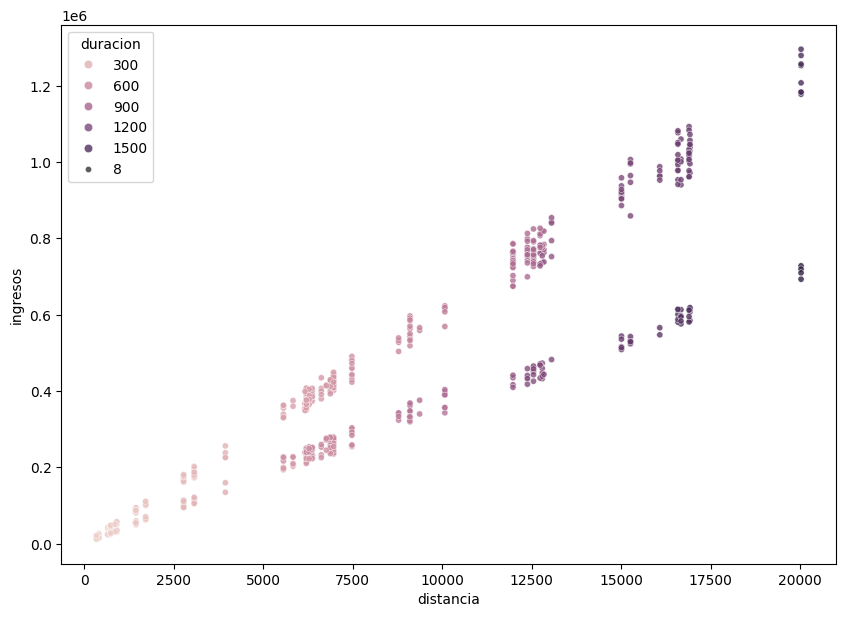

In [ ]:
compara_multi(df_viajes,"distancia","ingresos", columna_categorica="duracion") 

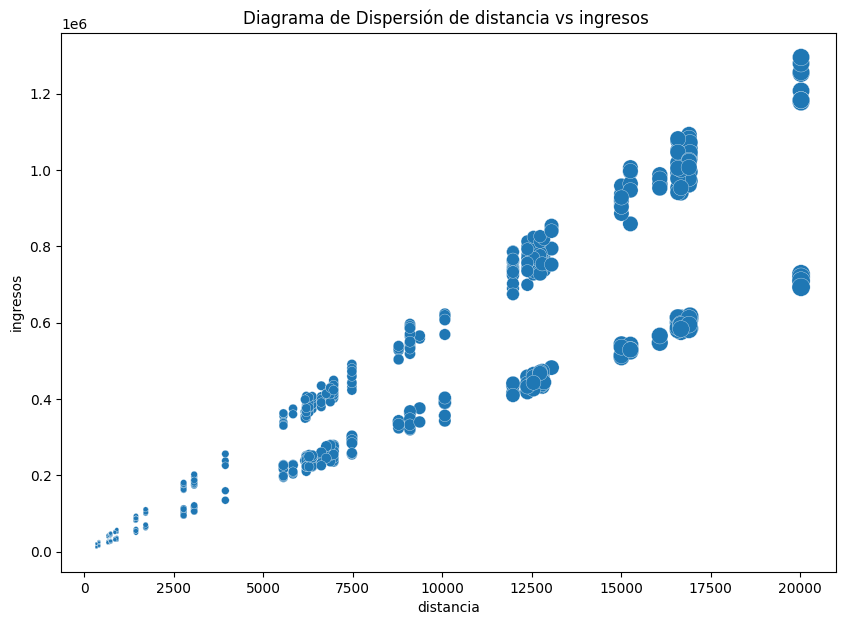

In [61]:
# Se complica la visualización por lo que optaremos por usar la columna categórica para determinar el tamño de las bolas. Ajustamos el tamaño de las bolas dividiendo entre 10 ya que de manera predeterminada nos aparecen demasiado grandes para verlo con claridad.
compara_multi(df_viajes,"distancia","ingresos", size=df_viajes["duracion"]/10) 